#  Caption Generation using Deep Learning techniques



# BTech Major Project


In [ ]:
!pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.1 MB/s eta 0:00:00


In [ ]:
import ipywidgets as widgets
from IPython.display import display

In [ ]:
!git clone https://github.com/Priyanshu-001/image-Captioning-CNN---LSTM

In [ ]:
%cd image-Captioning-CNN---LSTM

In [ ]:
!pip install scikit-image

In [ ]:
# !cd MajorProject
# !ls
from __future__ import print_function
import time, os, json
import numpy as np
import matplotlib.pyplot as plt

from rnn_layers import *
from captioning_solver import CaptioningSolver
from classifiers.rnn import CaptioningRNN
from coco_utils import load_coco_data, sample_coco_minibatch, decode_captions
from matplotlib.pyplot import imread
from image_utils import image_from_url
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2


In [ ]:
 #!datasets/get_coco_captioning.sh # uncomment to download
!wget "http://cs231n.stanford.edu/coco_captioning.zip"
!unzip coco_captioning.zip
!rm coco_captioning.zip

--2023-05-28 08:57:21--  http://cs231n.stanford.edu/coco_captioning.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1035210391 (987M) [application/zip]
Saving to: ‘coco_captioning.zip’

coco_captioning.zip 100%[===================>] 987.25M  36.7MB/s    in 30s     

2023-05-28 08:57:52 (32.5 MB/s) - ‘coco_captioning.zip’ saved [1035210391/1035210391]

Archive:  coco_captioning.zip
   creating: coco_captioning/
  inflating: coco_captioning/coco2014_captions.h5  
  inflating: coco_captioning/coco2014_vocab.json  
  inflating: coco_captioning/train2014_images.txt  
  inflating: coco_captioning/train2014_urls.txt  
  inflating: coco_captioning/train2014_vgg16_fc7.h5  
  inflating: coco_captioning/train2014_vgg16_fc7_pca.h5  
  inflating: coco_captioning/val2014_images.txt  
  inflating: coco_captioning/val2014_urls.txt  
  inf

In [ ]:
!mv coco_captioning/ datasets/

In [ ]:
from zipfile import *
!unzip coco_captioning.zip
!rm coco_captioning.zip

unzip:  cannot find or open coco_captioning.zip, coco_captioning.zip.zip or coco_captioning.zip.ZIP.
rm: cannot remove 'coco_captioning.zip': No such file or directory


In [ ]:
data = load_coco_data(pca_features=True)


for k, v in data.items():
    if type(v) == np.ndarray:
        print(k, type(v), v.shape, v.dtype)
    else:
        print(k, type(v), len(v))

train_captions <class 'numpy.ndarray'> (400135, 17) int32
train_image_idxs <class 'numpy.ndarray'> (400135,) int32
val_captions <class 'numpy.ndarray'> (195954, 17) int32
val_image_idxs <class 'numpy.ndarray'> (195954,) int32
train_features <class 'numpy.ndarray'> (82783, 512) float32
val_features <class 'numpy.ndarray'> (40504, 512) float32
idx_to_word <class 'list'> 1004
word_to_idx <class 'dict'> 1004
train_urls <class 'numpy.ndarray'> (82783,) <U63
val_urls <class 'numpy.ndarray'> (40504,) <U63


In [ ]:
data['val_features'][0]

512

(Iteration 1 / 100) loss: 75.446025
(Iteration 11 / 100) loss: 19.767405
(Iteration 21 / 100) loss: 5.702454
(Iteration 31 / 100) loss: 0.681969
(Iteration 41 / 100) loss: 0.106220
(Iteration 51 / 100) loss: 0.043035
(Iteration 61 / 100) loss: 0.024642
(Iteration 71 / 100) loss: 0.016990
(Iteration 81 / 100) loss: 0.013700
(Iteration 91 / 100) loss: 0.011291


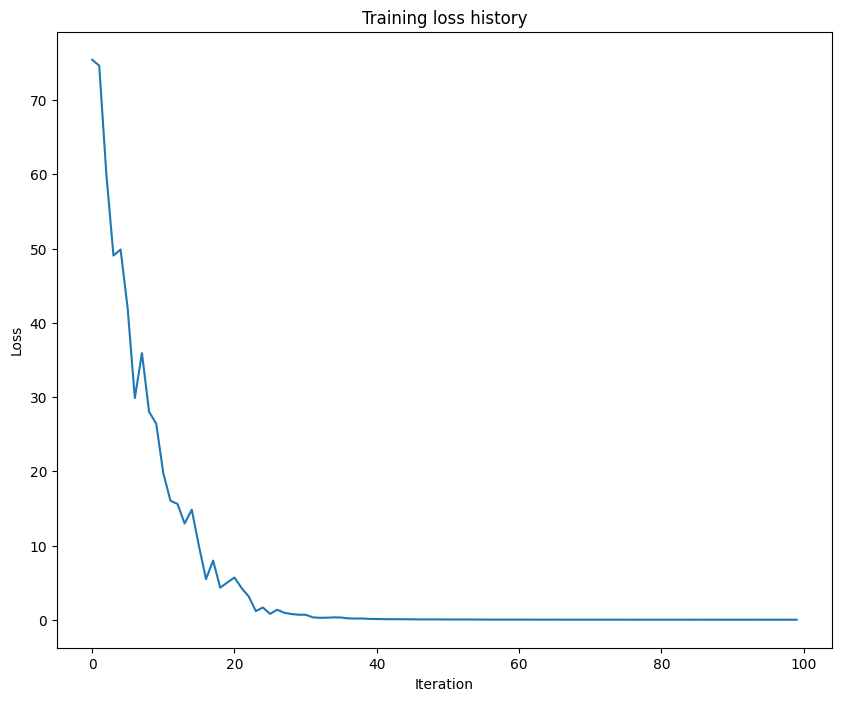

In [ ]:
np.random.seed(6969)

small_data = load_coco_data(max_train=50)

small_Rnn_model = CaptioningRNN(
          # cell_type='lstm',
          word_to_idx=data['word_to_idx'],
          input_dim=data['train_features'].shape[1],
          hidden_dim=512,
          wordvec_dim=256,
          dtype=np.float32,
        )

small_lstm_solver = CaptioningSolver(small_Rnn_model, small_data,
           update_rule='adam',
           num_epochs=50,
           batch_size=25,
           optim_config={
             'learning_rate': 7e-3,
           },
           lr_decay=0.995,
           verbose=True, print_every=10,
         )

small_lstm_solver.train()

# Plot the training losses
plt.plot(small_lstm_solver.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.show()

(Iteration 1 / 100) loss: 79.396334
(Iteration 11 / 100) loss: 36.699817
(Iteration 21 / 100) loss: 22.047153
(Iteration 31 / 100) loss: 7.703999
(Iteration 41 / 100) loss: 1.992812
(Iteration 51 / 100) loss: 0.645113
(Iteration 61 / 100) loss: 0.341130
(Iteration 71 / 100) loss: 0.264717
(Iteration 81 / 100) loss: 0.063722
(Iteration 91 / 100) loss: 0.051165


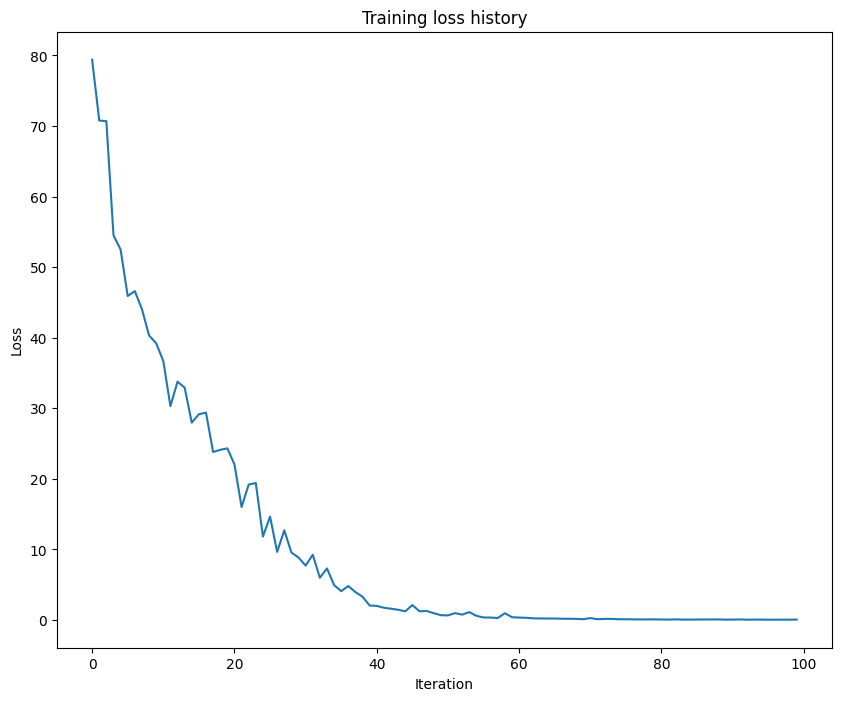

In [ ]:
np.random.seed(7807)

small_data = load_coco_data(max_train=50)

small_lstm_model = CaptioningRNN(
          cell_type='lstm',
          word_to_idx=data['word_to_idx'],
          input_dim=data['train_features'].shape[1],
          hidden_dim=512,
          wordvec_dim=256,
          dtype=np.float32,
        )

small_lstm_solver = CaptioningSolver(small_lstm_model, small_data,
           update_rule='adam',
           num_epochs=50,
           batch_size=25,
           optim_config={
             'learning_rate': 7e-3,
           },
           lr_decay=0.995,
           verbose=True, print_every=10,
         )

small_lstm_solver.train()

# Plot the training losses
plt.plot(small_lstm_solver.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.show()

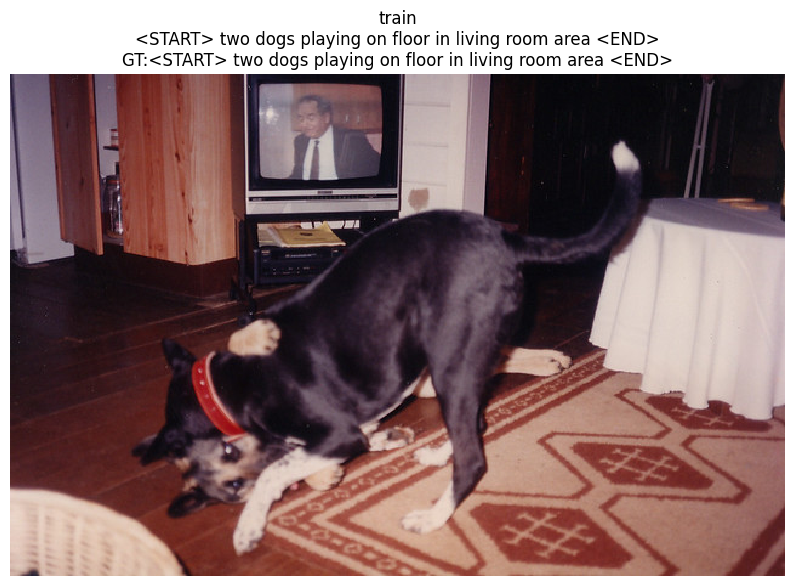

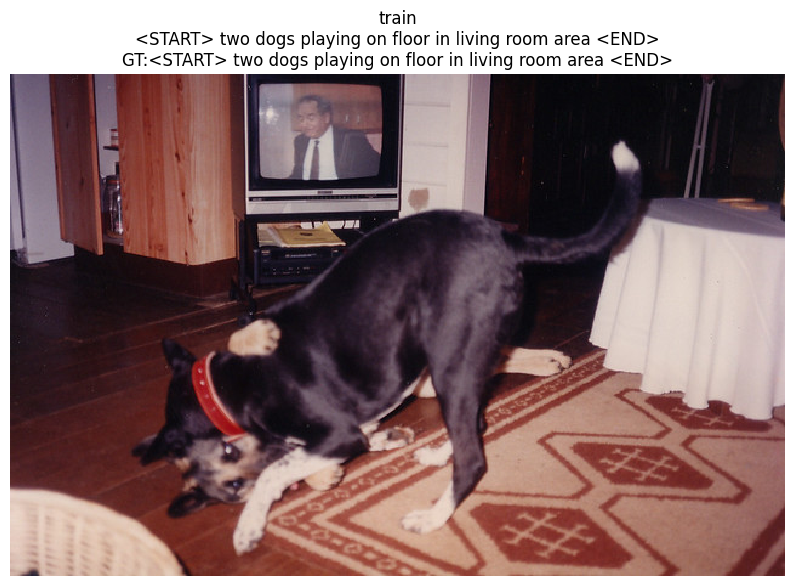

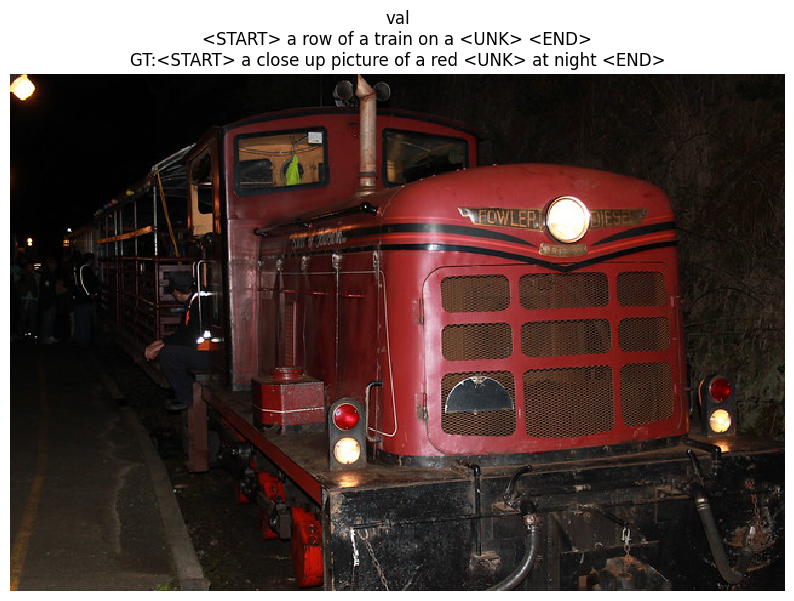

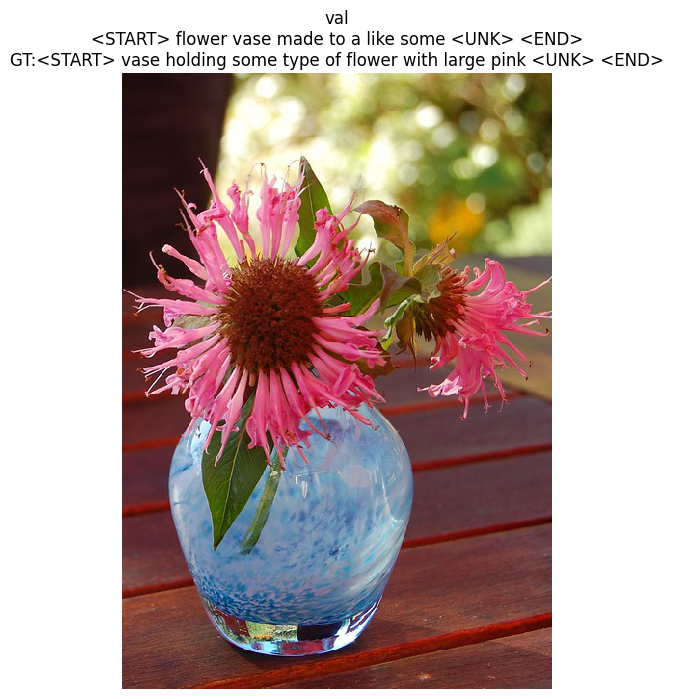

In [ ]:
from image_utils import image_from_url
for split in ['train', 'val']:
    minibatch = sample_coco_minibatch(small_data, split=split, batch_size=2)
    gt_captions, features, urls = minibatch
    gt_captions = decode_captions(gt_captions, data['idx_to_word'])

    sample_captions = small_lstm_model.sample(features)
    sample_captions = decode_captions(sample_captions, data['idx_to_word'])

    for gt_caption, sample_caption, url in zip(gt_captions, sample_captions, urls):
        plt.imshow(image_from_url(url))
        plt.title('%s\n%s\nGT:%s' % (split, sample_caption, gt_caption))
        plt.axis('off')
        plt.show()

In [ ]:
def BLEU_score(gt_caption, sample_caption):

    reference = [x for x in gt_caption.split(' ')
                 if ('<END>' not in x and '<START>' not in x and '<UNK>' not in x)]
    hypothesis = [x for x in sample_caption.split(' ')
                  if ('<END>' not in x and '<START>' not in x and '<UNK>' not in x)]
    BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis, weights = [1])
    return BLEUscore

def evaluate_model(model):

    BLEUscores = {}
    for split in ['train', 'val']:
        minibatch = sample_coco_minibatch(data, split=split, batch_size=1000)
        gt_captions, features, urls = minibatch
        gt_captions = decode_captions(gt_captions, data['idx_to_word'])

        sample_captions = model.sample(features)
        sample_captions = decode_captions(sample_captions, data['idx_to_word'])

        total_score = 0.0
        for gt_caption, sample_caption, url in zip(gt_captions, sample_captions, urls):
            total_score += BLEU_score(gt_caption, sample_caption)

        BLEUscores[split] = total_score / len(sample_captions)

    for split in BLEUscores:
        print('Average BLEU score for %s: %f' % (split, BLEUscores[split]))

In [ ]:
#Dials COnsole
epoch_slider = widgets.IntSlider(
    value=25,
    min=1,
    max=50,
    step=1,
    description='Epoch slider',
)
batch_slider = widgets.IntSlider(
    value=128,
    min=100,
    max=500,
    step=10,
    description='batch slider',
)
learning_rate_slider = widgets.FloatSlider(
    value=0.007,
    min = 0.001,
    max = 0.1,
    step = 0.001,
    description="lr slider",
    readout_format='.5f',

)
display(batch_slider,epoch_slider,learning_rate_slider)

IntSlider(value=128, description='batch slider', max=500, min=100, step=10)

IntSlider(value=25, description='Epoch slider', max=50, min=1)

FloatSlider(value=0.007, description='lr slider', max=0.1, min=0.001, readout_format='.5f', step=0.001)

In [ ]:
np.random.seed(7865)

data = load_coco_data()
print(batch_slider.value,epoch_slider.value,learning_rate_slider.value)
lstm_model = CaptioningRNN(
          cell_type='lstm',
          word_to_idx=data['word_to_idx'],
          input_dim=data['train_features'].shape[1],
          hidden_dim=512,
          wordvec_dim=256,
          dtype=np.float32,
        )

lstm_solver = CaptioningSolver(lstm_model, data,
           update_rule='adam',
           num_epochs=epoch_slider.value,
           batch_size=batch_slider.value,
           optim_config={
             'learning_rate': learning_rate_slider.value,
           },
           lr_decay=0.995,
           verbose=True, print_every=500,
         )
lstm_solver.train()


plt.plot(lstm_solver.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.show()

128 25 0.007
(Iteration 1 / 78150) loss: 77.539806
(Iteration 501 / 78150) loss: 27.315143
(Iteration 1001 / 78150) loss: 29.094377
(Iteration 1501 / 78150) loss: 26.663020
(Iteration 2001 / 78150) loss: 28.525796
(Iteration 2501 / 78150) loss: 26.802621
(Iteration 3001 / 78150) loss: 28.545072
(Iteration 3501 / 78150) loss: 27.436994
(Iteration 4001 / 78150) loss: 28.103803
(Iteration 4501 / 78150) loss: 26.372560
(Iteration 5001 / 78150) loss: 26.653193
(Iteration 5501 / 78150) loss: 26.575718
(Iteration 6001 / 78150) loss: 25.763682
(Iteration 6501 / 78150) loss: 25.237987
(Iteration 7001 / 78150) loss: 25.497007
(Iteration 7501 / 78150) loss: 26.186823


KeyboardInterrupt: ignored

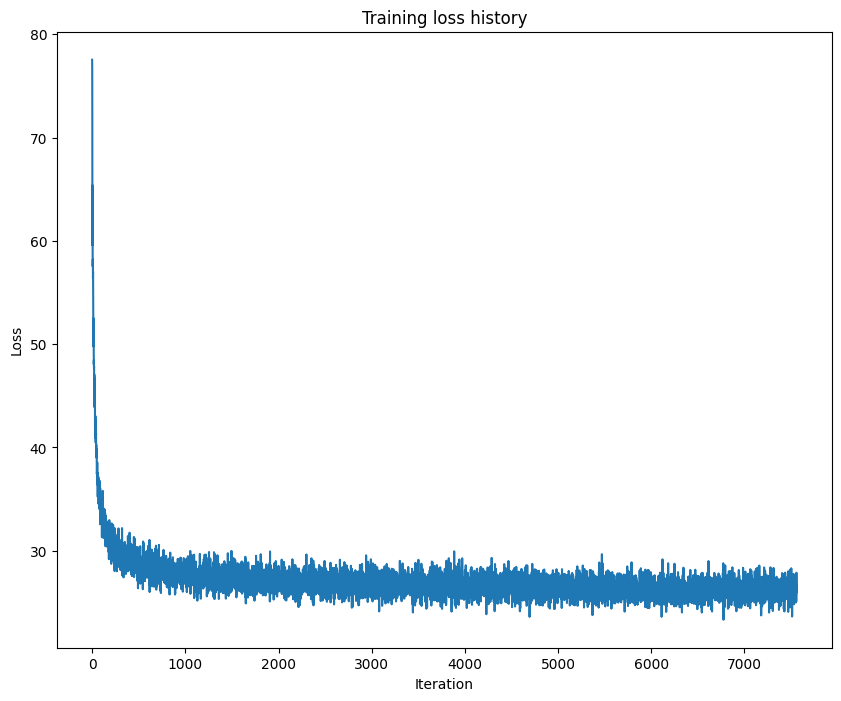

In [ ]:
plt.plot(lstm_solver.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.show()

In [ ]:
import nltk

evaluate_model(lstm_model)

NameError: ignored

In [ ]:
import json
json.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
params = lstm_solver.model.params

In [ ]:
params

{'W_embed': array([[ 1.1943676e-02, -1.5689703e-02, -7.1131433e-03, ...,
          1.2754812e-02,  2.4908166e-03, -3.0116839e-03],
        [ 4.6067458e-01,  2.1178300e+00,  2.4799497e-01, ...,
          1.1634885e+00, -1.5107723e+00,  2.2481592e-01],
        [-9.4906410e-04, -1.2202524e-02,  5.7546870e-04, ...,
         -4.0377122e-03,  1.3737470e-02, -5.5206229e-04],
        ...,
        [ 9.0134546e-02, -1.9706146e-01, -7.8669524e-01, ...,
         -2.3636708e-01,  3.9456972e-01, -1.3783114e-01],
        [-3.1117827e-01, -3.4345177e-01,  1.9942799e-01, ...,
          3.9881620e-01,  1.0329341e-01,  2.8609782e-01],
        [-3.0884343e-01,  3.6097530e-01, -2.9437637e-01, ...,
         -5.1736534e-01,  4.8704907e-01, -6.8347561e-01]], dtype=float32),
 'W_proj': array([[ 0.5363561 , -0.6800729 , -0.18687138, ..., -0.0058389 ,
         -1.3914958 , -0.7038078 ],
        [ 0.24367175,  0.7719955 ,  0.42715716, ..., -0.1278458 ,
         -0.43123212, -1.1279843 ],
        [-0.08539401, -0.

In [ ]:
!mkdir /content/drive/MyDrive/btechfinal/models

In [ ]:
j_param = {}
for i in params.keys():
  print(i,type(params[i]))
  j_param[i] = params[i].tolist()

W_embed <class 'numpy.ndarray'>
W_proj <class 'numpy.ndarray'>
b_proj <class 'numpy.ndarray'>
Wx <class 'numpy.ndarray'>
Wh <class 'numpy.ndarray'>
b <class 'numpy.ndarray'>
W_vocab <class 'numpy.ndarray'>
b_vocab <class 'numpy.ndarray'>


In [ ]:
with open("/content/drive/MyDrive/btechfinal/models/snapshot1950.json", "w+") as outfile:
  json.dump(j_param,outfile)

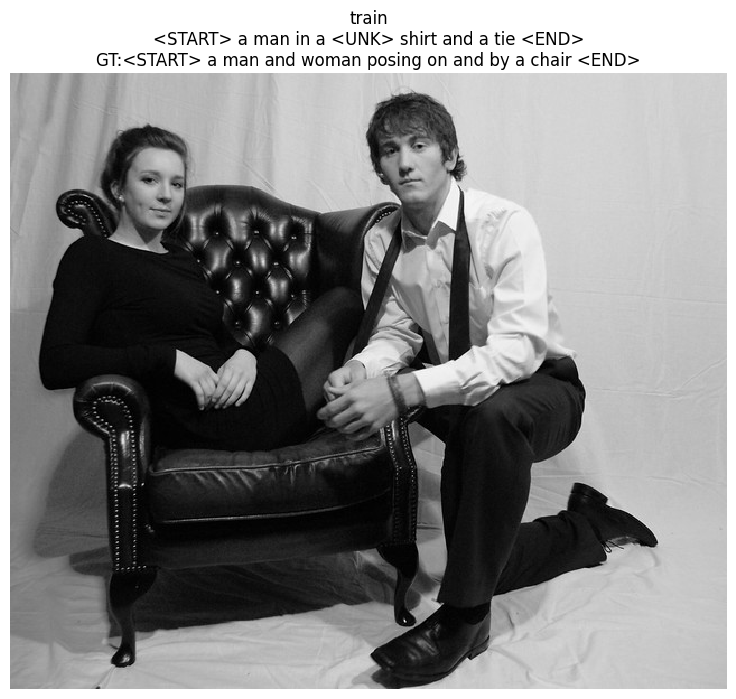

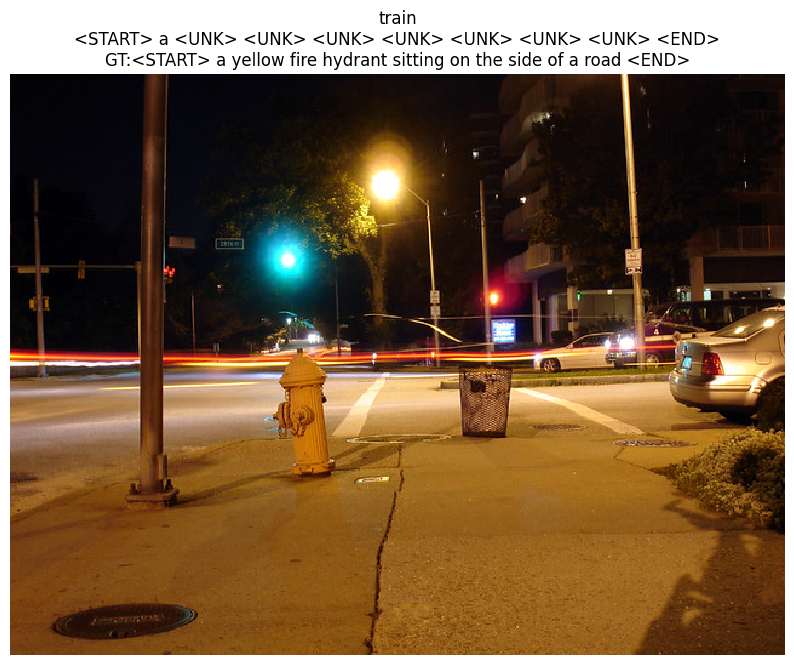

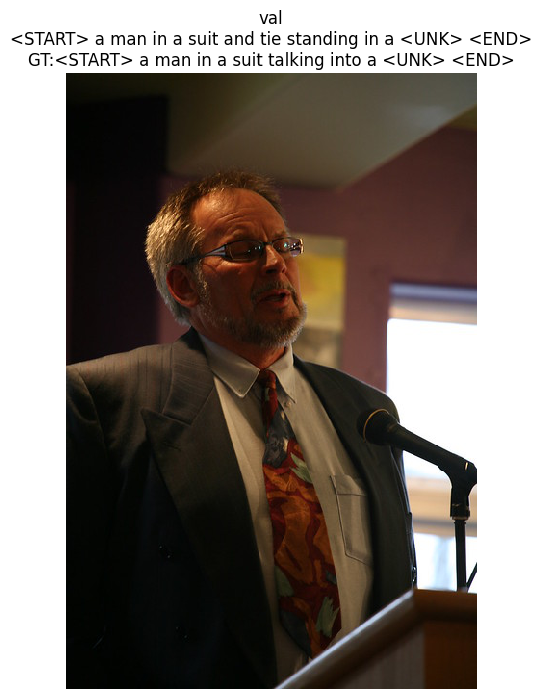

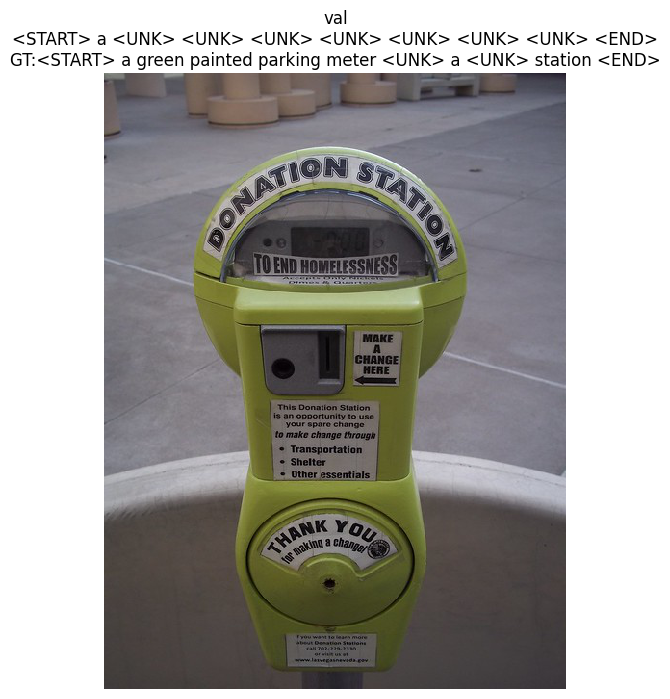

In [ ]:
for split in ['train', 'val']:
    minibatch = sample_coco_minibatch(data, split=split, batch_size=2)
    gt_captions, features, urls = minibatch
    gt_captions = decode_captions(gt_captions, data['idx_to_word'])

    sample_captions = lstm_model.sample(features)
    sample_captions = decode_captions(sample_captions, data['idx_to_word'])

    for gt_caption, sample_caption, url in zip(gt_captions, sample_captions, urls):
        plt.imshow(image_from_url(url))
        plt.title('%s\n%s\nGT:%s' % (split, sample_caption, gt_caption))
        plt.axis('off')
        plt.show()

In [ ]:
for split in ['train', 'val']:
    minibatch = sample_coco_minibatch(data, split=split, batch_size=2)
    gt_captions, features, urls = minibatch
    gt_captions = decode_captions(gt_captions, data['idx_to_word'])

    sample_captions = lstm_model.sample(features)
    sample_captions = decode_captions(sample_captions, data['idx_to_word'])

    for gt_caption, sample_caption, url in zip(gt_captions, sample_captions, urls):
        plt.imshow(image_from_url(url))
        plt.title('%s\n%s\nGT:%s' % (split, sample_caption, gt_caption))
        plt.axis('off')
        plt.show()

Output hidden; open in https://colab.research.google.com to view.